# Spanish Translation A/B Test
## Cristian Garay

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data exploration

In [2]:
user_table_original = pd.read_csv('Translation_Test/user_table.csv')
user_table_original.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [4]:
user_table_original.shape

(452867, 4)

In [6]:
#I guess no user should be repeated here:
len(user_table_original['user_id'].unique())

452867

In [10]:
#Lets see how many users we have for each country:
user_table_original.groupby(['country']).size()

country
Argentina       46733
Bolivia         11124
Chile           19737
Colombia        54060
Costa Rica       5309
Ecuador         15895
El Salvador      8175
Guatemala       15125
Honduras         8568
Mexico         128484
Nicaragua        6723
Panama           3951
Paraguay         7347
Peru            33666
Spain           51782
Uruguay          4134
Venezuela       32054
dtype: int64

In [3]:
test_table_original = pd.read_csv('Translation_Test/test_table.csv')
test_table_original.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [5]:
test_table_original.shape

(453321, 9)

In [8]:
#do I have more than one row per user here? No
len(test_table_original['user_id'].unique())

453321

I guess I have more user id's here than I have on the user table. For now I'll ignore those user ids and will work only with the ones that exist on the user table.

In [11]:
#I'll join the dataframes together to work with all the data.
user_and_test_table = pd.merge(user_table_original, test_table_original, suffixes=('_u', '_t'))
user_and_test_table.head()

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
4,554597,F,20,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0


In [12]:
user_and_test_table.shape

(452867, 12)

## Check rate conversion

Let's first check the rate conversion in general (not counting users from Spain): 

In [16]:
user_and_test_table[user_and_test_table['country'] != 'Spain'].groupby(['test']).mean()['conversion']*100

test
0    4.829179
1    4.341116
Name: conversion, dtype: float64

Seems like the overall convertion rate is better with the _old_ site than with the new one.

Now I'll check the rate conversions per country whether they took the test or not.

In [15]:
user_and_test_table.groupby(['country', 'test']).mean()['conversion']*100

country      test
Argentina    0       1.507054
             1       1.372502
Bolivia      0       4.936937
             1       4.790097
Chile        0       4.810718
             1       5.129502
Colombia     0       5.208949
             1       5.057096
Costa Rica   0       5.225564
             1       5.473764
Ecuador      0       4.915381
             1       4.898842
El Salvador  0       5.355404
             1       4.794689
Guatemala    0       5.064288
             1       4.864721
Honduras     0       5.090576
             1       4.753981
Mexico       0       4.949462
             1       5.118631
Nicaragua    0       5.264697
             1       5.417676
Panama       0       4.679552
             1       4.937028
Paraguay     0       4.849315
             1       4.922910
Peru         0       4.991404
             1       5.060427
Spain        0       7.971882
Uruguay      0       1.204819
             1       1.290670
Venezuela    0       5.034367
             1       4

In [22]:
conversion_rates_by_country_and_test = user_and_test_table.groupby(['country', 'test']).mean()['conversion']*100
conversion_rates_by_country_and_test.head()

country    test
Argentina  0       1.507054
           1       1.372502
Bolivia    0       4.936937
           1       4.790097
Chile      0       4.810718
Name: conversion, dtype: float64

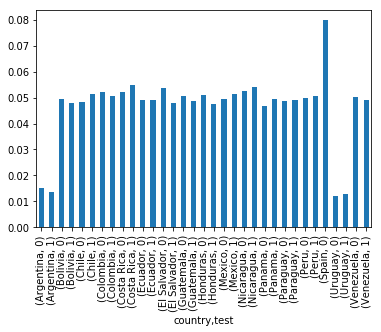

In [21]:
user_and_test_table.groupby(['country', 'test']).mean()['conversion'].plot(kind='bar', stacked=False)